In [3]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import pyrubberband as prb
import soundfile as sf 


In [4]:
audiotrack = "/home/adam/Music/oocj-169bpm.flac"
(y, sr) = librosa.load(audiotrack, sr=44100, res_type='kaiser_fast')

In [5]:
def sp(y, sr=44100):
    S = librosa.stft(y, n_fft=1024, hop_length=256,
                             win_length=1024)
    M = librosa.core.magphase(S)[0]
    spct = librosa.amplitude_to_db(M, ref=np.max)
    return spct

In [6]:
def plot_spectrogram(spec): 
    (h, w) = spec.shape
    fig = plt.figure()
    ax = plt.subplot(111)
    ax.set_frame_on(False)
    plt.axis('off')
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)

    # Perform some magnitue-to-frequency calculations, and write the result to the figure
    librosa.display.specshow(spec, y_axis='linear')
    plt.show()

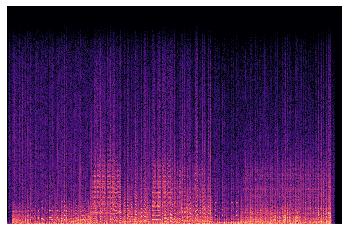

In [7]:
plot_spectrogram(sp(y))

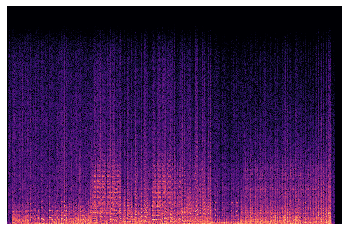

In [8]:
slower = librosa.effects.time_stretch(y, 0.75)
sf.write("/home/adam/Music/librosa-slower-oocj.flac", slower, sr, format='flac')
plot_spectrogram(sp(slower))

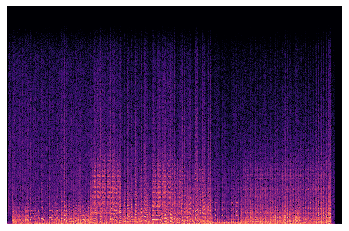

In [9]:
faster = librosa.effects.time_stretch(y, 1.5)
sf.write("/home/adam/Music/librosa-faster-oocj.flac", faster, sr, format='flac')
plot_spectrogram(sp(faster))

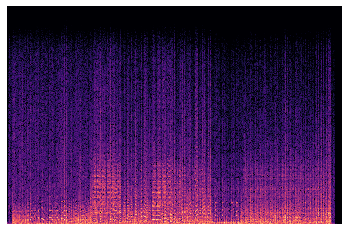

In [10]:
rb_slower = prb.pyrb.time_stretch(y, sr, 0.75)
sf.write("/home/adam/Music/rubberband-slower-oocj.flac", rb_slower, sr, format='flac')
plot_spectrogram(sp(rb_slower))

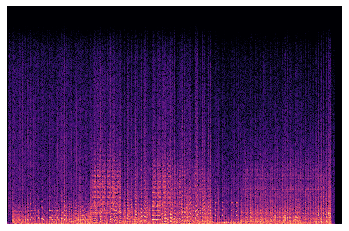

In [11]:
rb_faster = prb.pyrb.time_stretch(y, sr, 1.5)
sf.write("/home/adam/Music/rubberband-faster-oocj.flac", rb_faster, sr, format='flac')
plot_spectrogram(sp(rb_faster))

In [12]:
import timeit

In [16]:
%timeit slower = librosa.effects.time_stretch(y, 0.75)

3.7 s ± 18 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
%timeit rb_slower = prb.pyrb.time_stretch(y, sr, 0.75)

4.01 s ± 39.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
